In [1]:
import pandas as pd
import numpy as np
import ffn
%matplotlib inline

In [2]:
num_days = 1000
data = (np.random.randn(num_days) + np.random.uniform(low=0.0, high=0.2, size=num_days))
index = pd.date_range('01/01/2010',periods=num_days, freq='D')
data = pd.DataFrame(data,index=index,columns=['Returns'])
data['Equity'] = data.cumsum() + 100
data.iloc[0] = 100

In [3]:
perf = data['Equity'].calc_stats()

C:\Anaconda3\envs\invest_basic\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [4]:
type(perf)

ffn.core.PerformanceStats

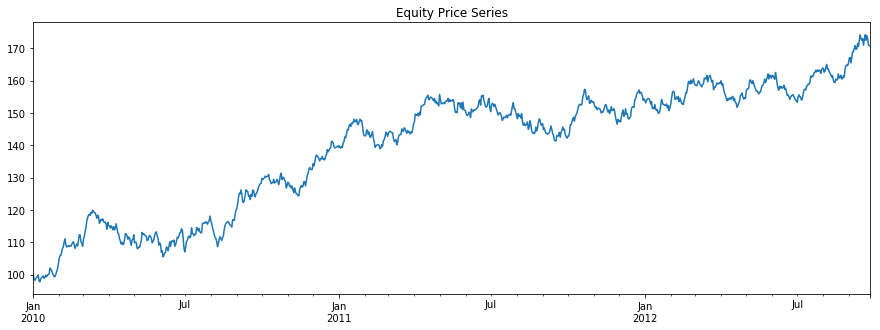

In [5]:
perf.plot()

In [6]:
perf.display()

Stats for Equity from 2010-01-01 00:00:00 - 2012-09-26 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
70.60%              1.19  21.57%  -11.98%

Annualized Returns:
mtd    3m     6m     ytd     1y      3y      5y    10y    incep.
-----  -----  -----  ------  ------  ------  ----  -----  --------
3.22%  9.60%  7.67%  10.53%  17.90%  21.57%  -     -      21.57%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.19     1.49       66.11
mean    14.19%   19.84%     10.64%
vol     11.92%   13.29%     0.16%
skew    -0.02    0.16       -
kurt    0.34     -1.04      -
best    2.55%    9.26%      10.75%
worst   -2.90%   -4.53%     10.53%

Drawdowns:
max      avg       # days
-------  ------  --------
-11.98%  -2.05%     19.15

Misc:
---------------  -------
avg. up month    4.49%
avg. down month  -1.99%
up year %        100.00%
12m up %         100.

In [7]:
perf.display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2010   3.19   6.26   5.93  -4.53  -1.62  -0.94   9.26   1.54   6.99  -0.64   3.94   5.19  39.36
  2011   2.57  -0.16   2.71   3.8   -0.88   0.51  -0.91  -2.75  -2.69   7.98  -3.62   4.33  10.75
  2012  -1.78   5.04  -0.1   -2.96   4.08  -4.27   6.46   0.92   3.22   0      0      0     10.53


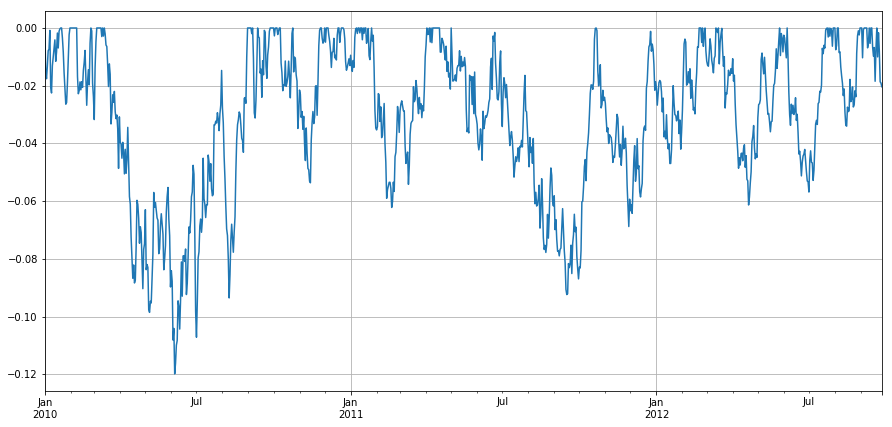

In [8]:
ffn.to_drawdown_series(data['Equity']).plot(figsize=(15,7),grid=True)

C:\Anaconda3\envs\invest_basic\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


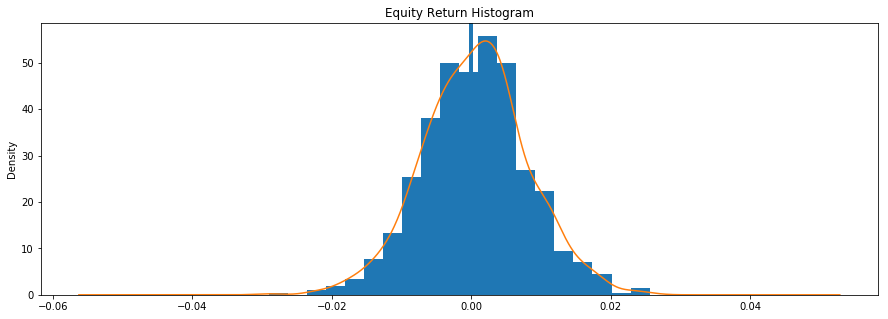

In [9]:
perf.plot_histogram()

In [10]:
perf.stats

start                    2010-01-01 00:00:00
end                      2012-09-26 00:00:00
rf                                         0
total_return                        0.705998
cagr                                0.215668
max_drawdown                       -0.119811
calmar                               1.80006
mtd                                0.0321917
three_month                        0.0960485
six_month                          0.0766755
ytd                                  0.10527
one_year                            0.179017
three_year                          0.215668
five_year                                NaN
ten_year                                 NaN
incep                               0.215668
daily_sharpe                         1.19041
daily_sortino                        2.11056
daily_mean                          0.141868
daily_vol                           0.119176
daily_skew                         -0.020437
daily_kurt                          0.340545
best_day  

In [11]:
perf.stats['yearly_sharpe']

66.10666217757247

In [12]:
perf.display_lookback_returns()

mtd       3.22%
3m        9.60%
6m        7.67%
ytd      10.53%
1y       17.90%
3y       21.57%
5y         nan%
10y        nan%
incep    21.57%
Name: Equity, dtype: object